# 경사하강법 Gradient Descent

### 잔차제곱합 (Residual Sum of Squares, RSS)
- 잔차 = 실제 값 - 예측 값
- 잔차제곱합 = (실제 값 - 예측 값)의 제곱의 합
- 회귀 모델의 정확도를 측정하는 지표
    - RSS가 작을수록 정확하게 예측하는 모델
    - RSS가 클수록 잘못된 예측하는 모델

- 모든 회귀 모델은 RSS가 최소가 되는 방향으로 학습이 진행됨 = 회귀계수(절편)는 RSS가 최소가 되도록 학습
- 비용함수 R(w)가 가장 작을 때의 w를 찾는 것이 회귀 모델의 목표
    - 매 회차에 계산된 R(w)에서 순간변화율(기울기)를 구해야 함 → 미분 사용
    - 단, 우리가 구해야 하는 회귀계수는 하나 이상이므로 우리는 편미분을 사용함
        - w0(절편)을 고정한 채로 w1의 미분을 구하고, w1을 고정한 채로 w0 미분을 구함

**경사하강법 수식**

$w_1$ $w_0$을 반복적으로 업데이트하며 최적의 회귀계수를 찾음
<br/>
$w_1 = w_1 - (-η\frac{2}{N}\sum^{N}_{i=1} x_i * (실제값_i - 예측값_i))$
<br/>
$w_0 = w_0 - (-η\frac{2}{N}\sum^{N}_{i=1}(실제값_i - 예측값_i))$

<img src="https://d.pr/i/0vERpX+" alt="경사하강법" width="500">

**경사하강법 공식**

$w1 = w1 - (미분값)$

$w1 = w1 - (-학습률 * 2 / N * (x * (실제값 - 예측값))의 합)$

$w0 = w0 - (미분값)$

$w0 = w0 - (-학습률 * 2 / N * (실제값 - 예측값)의 합)$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)
x = np.random.rand(100, 1)
print(x.shape, x[:10])

(100, 1) [[0.5488135 ]
 [0.71518937]
 [0.60276338]
 [0.54488318]
 [0.4236548 ]
 [0.64589411]
 [0.43758721]
 [0.891773  ]
 [0.96366276]
 [0.38344152]]


In [4]:
noise = np.random.randn(100, 1)
y = 6 + 4 * x + noise
print(y[:10])

[[ 7.03010417]
 [ 9.76158395]
 [ 8.87671594]
 [ 6.64328905]
 [ 9.18287139]
 [10.47946563]
 [ 8.92912842]
 [ 9.38716717]
 [ 8.78389842]
 [ 8.5882178 ]]


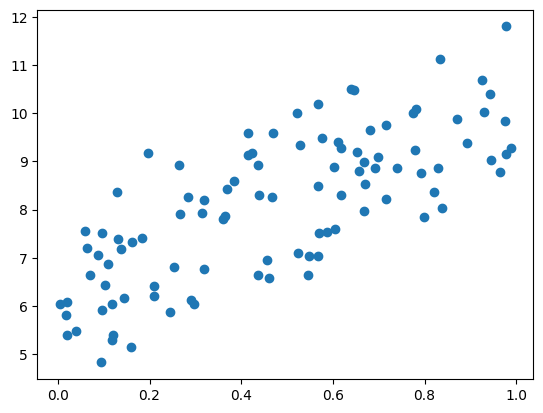

In [5]:
plt.scatter(x, y)
plt.show()

In [7]:
# 경사하강법 실행

# 회귀계수(가중치) 초기화
w0 = np.zeros((1, 1)) # b 절편
w1 = np.zeros((1, 1)) # w 가중치

# 잔차 계산
y_pred = w0 + np.dot(x, w1)
diff = y - y_pred

# 학습률
learning_rate = 0.01

# 데이터 개수
N = len(x)

# w0 편미분 (w0를 갱신할 값)
# w0 = w0 -(-학습률 * 2 / N * (실제값 - 예측값)의 합)
w0_diff = - learning_rate * 2 / N * np.sum(diff)

# w0 절편 갱신
w0 = w0 - w0_diff

# w1 편미분 (w1을 갱신할 값)
# dot 연산을 하려면 첫번째 행렬의 열과 두번째 행렬의 행의 수가 일치해야 함. T로 전치행렬 만듦
w1_diff = - learning_rate * 2 / N * np.dot(x.T, diff)
w1 = w1 - w1_diff

print(f'1회 업데이트된 회귀계수 w0: {w0}, w1: {w1}')

1회 업데이트된 회귀계수 w0: [[0.16167019]], w1: [[0.08298126]]


In [14]:
def gradient_descent(x, y, learning_rate=0.1, max_iter=10):
    # 회귀계수(가중치) 초기화
    w0 = np.zeros((1, 1)) # b 절편
    w1 = np.zeros((1, 1)) # w 가중치
    
    # 데이터 개수
    N = len(x)

    for _ in range(max_iter):
        # 잔차 계산
        y_pred = w0 + np.dot(x, w1)
        diff = y - y_pred

        # w0 편미분 (w0를 갱신할 값)
        # w0 = w0 -(-학습률 * 2 / N * (실제값 - 예측값)의 합)
        w0_diff = - learning_rate * 2 / N * np.sum(diff)

        # w0 절편 갱신
        w0 = w0 - w0_diff

        # w1 편미분 (w1을 갱신할 값)
        # dot 연산을 하려면 첫번째 행렬의 열과 두번째 행렬의 행의 수가 일치해야 함. T로 전치행렬 만듦
        w1_diff = - learning_rate * 2 / N * np.dot(x.T, diff)
        
        # w1 가중치 갱신
        w1 = w1 - w1_diff

        # 시각화
        plt.Figure(figsize=(3, 2))
        plt.scatter(x, y)
        plt.plot(x, y_pred, color='red')
        plt.show()

    return w0, w1

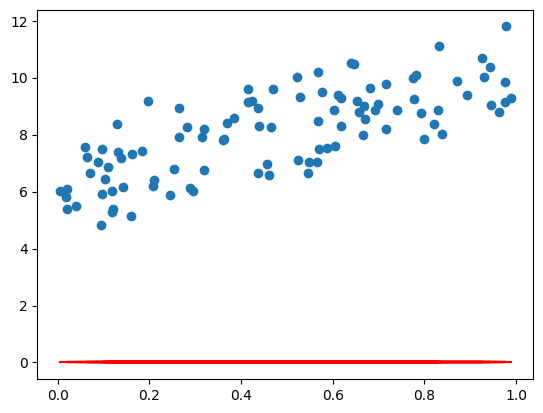

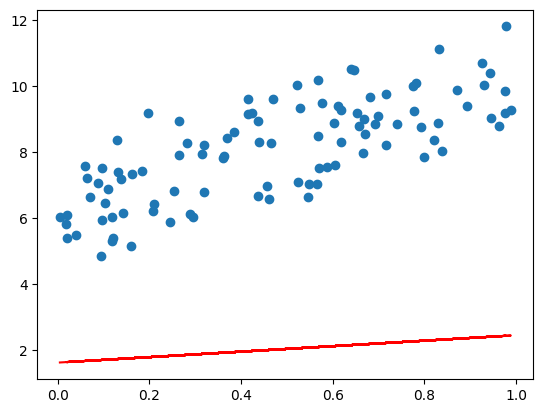

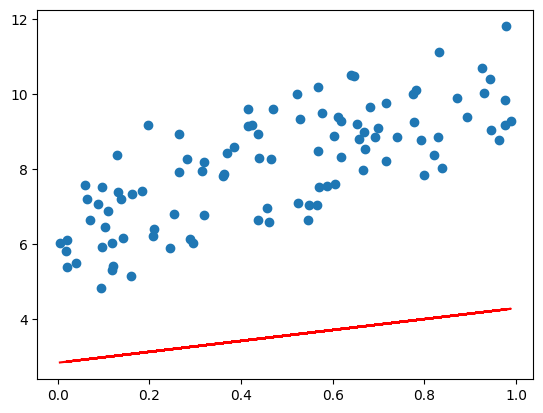

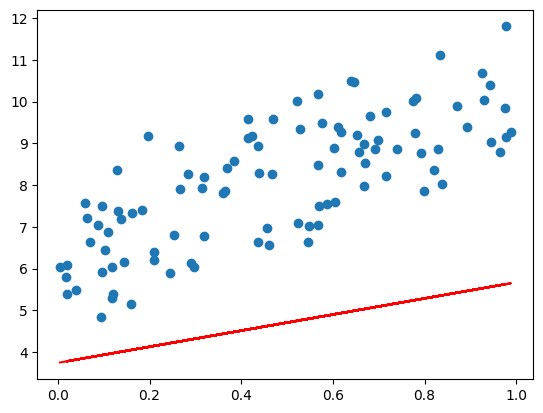

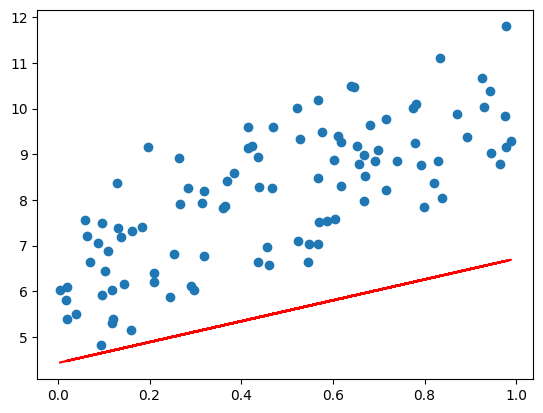

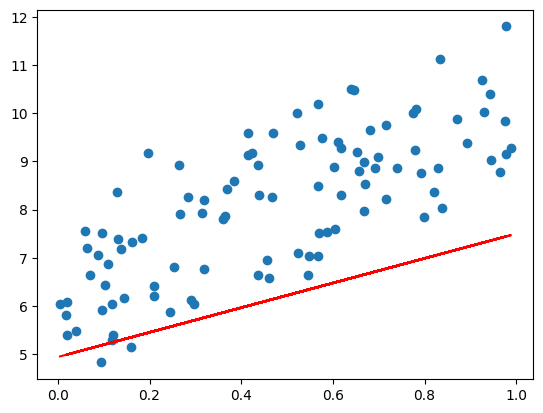

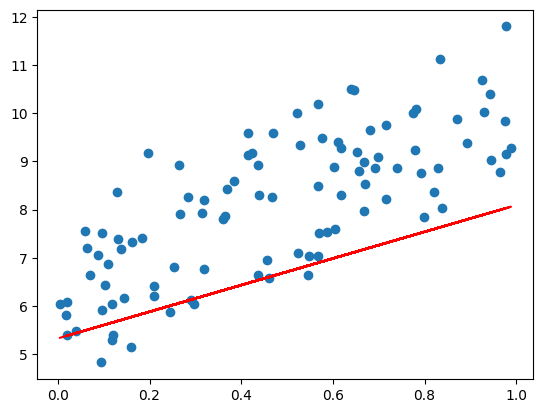

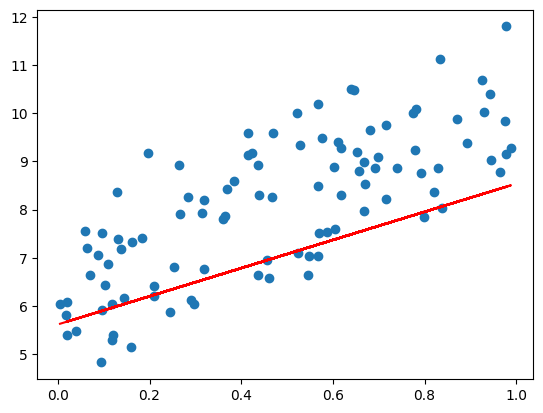

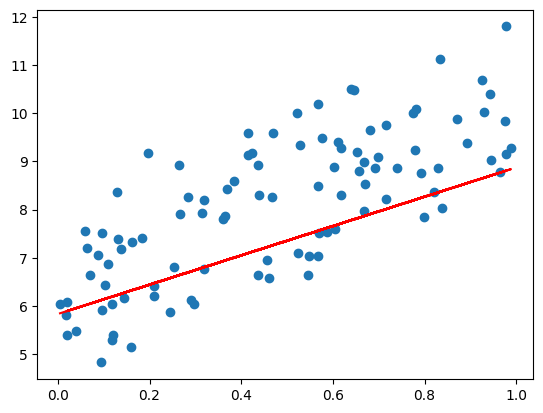

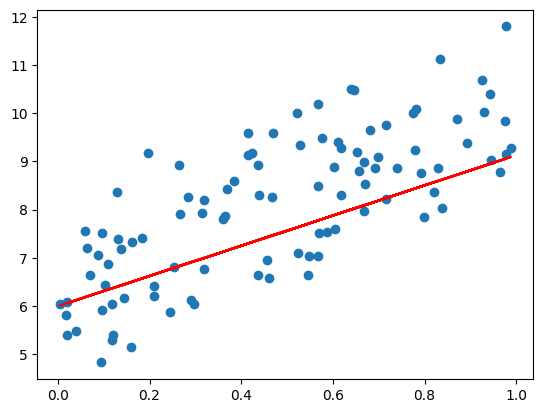

최종 회귀계수(가중치): [[3.20029471]]
최종 회귀계수(절편): [[6.11972178]]


In [15]:
w0, w1 = gradient_descent(x, y)

print(f'최종 회귀계수(가중치): {w1}')
print(f'최종 회귀계수(절편): {w0}')

In [16]:
def cost_function(y_true, y_pred):
    return np.sum((y_true -y_pred) ** 2) / len(y_true)

In [17]:
y_pred = w0 + np.dot(x, w1)
print('비용함수 결과:', cost_function(y, y_pred))

비용함수 결과: 1.240679585824825


In [26]:
def mini_batch_gradient_descent(x, y, batch_size=10, learning_rate=0.1, max_iter=10):
    # 회귀계수(가중치) 초기화
    w0 = np.zeros((1, 1)) # b 절편
    w1 = np.zeros((1, 1)) # w 가중치
    
    # 데이터 개수
    N = batch_size

    for _ in range(max_iter):
        # 미니배치 데이터 선정
        random_index = np.random.permutation(x.shape[0]) # 랜덤하게 섞음
        x_sample = x[random_index[:batch_size]]
        y_sample = y[random_index[:batch_size]]


        # 잔차 계산
        y_pred = w0 + np.dot(x_sample, w1)
        diff = y_sample - y_pred

        # w0 편미분 (w0를 갱신할 값)
        # w0 = w0 -(-학습률 * 2 / N * (실제값 - 예측값)의 합)
        w0_diff = - learning_rate * 2 / N * np.sum(diff)

        # w0 절편 갱신
        w0 = w0 - w0_diff

        # w1 편미분 (w1을 갱신할 값)
        # dot 연산을 하려면 첫번째 행렬의 열과 두번째 행렬의 행의 수가 일치해야 함. T로 전치행렬 만듦
        w1_diff = - learning_rate * 2 / N * np.dot(x_sample.T, diff)
        
        # w1 가중치 갱신
        w1 = w1 - w1_diff

        # 시각화
        # plt.Figure(figsize=(3, 2))
        # plt.scatter(x, y)
        # plt.plot(x, y, color='red')
        # plt.show()
        # 시각화
        plt.figure(figsize=(4, 3))
        plt.scatter(x, y)
        plt.plot(x, w0 + x * w1, color='red')
        plt.show()


    return w0, w1

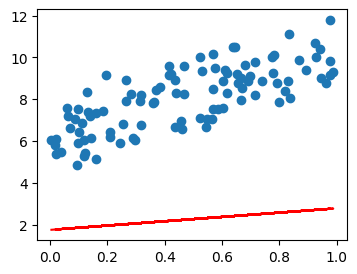

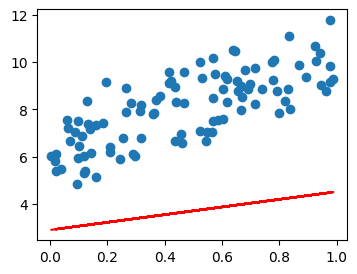

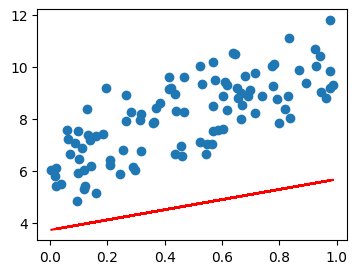

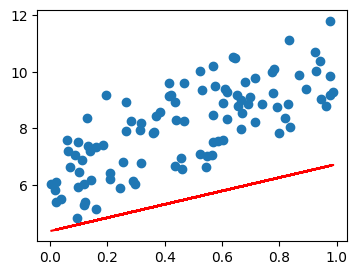

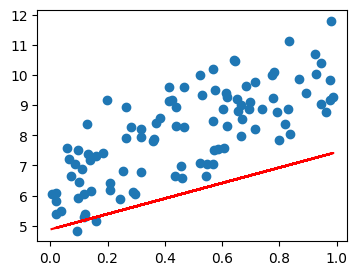

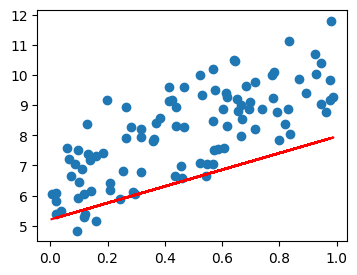

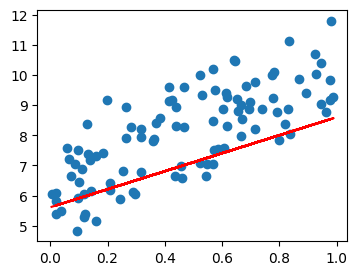

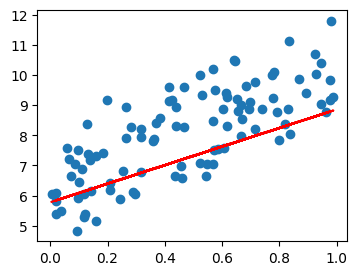

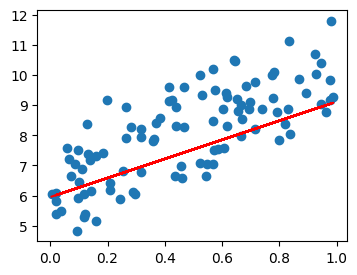

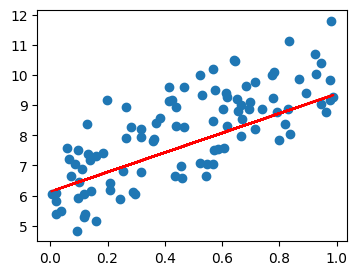

최종 회귀계수(가중치): [[3.24408685]]
최종 회귀계수(절편): [[6.12827209]]


In [27]:
w0, w1 = mini_batch_gradient_descent(x, y)

print(f'최종 회귀계수(가중치): {w1}')
print(f'최종 회귀계수(절편): {w0}')